In [1]:
"""
David Li
dli44@jhu.edu
Computational Biology HW3
dli44_hw3.py
"""
import math

def hw3():
    
    #calculate 3d distances
    def euclidean(src, dest):
        return math.sqrt(sum([(src[i]-dest[i])*(src[i]-dest[i]) for i in range(len(src))]))
    
    #Pythonic method of reading in file
    with open('1RA2.pdb') as f:
        in_pdb = f.readlines()
        
    #split and strip at once with list comprehension
    atoms = [in_pdb[i].strip().split() for i in range(len(in_pdb))]        
    
    #separate alpha carbon information
    carbons = []
    for i in range(len(atoms)):
        if atoms[i][0] =='ATOM' and atoms[i][2] == 'CA':
            carbons.append(atoms[i])
    
    #save all distances in a list
    dists = []
    
    #open file for writing
    with open('dli44.txt', 'w') as f:
        #calculate distance
        for i in range(len(carbons)-3):
            #calculate distances for each pair of i, i+3
            src = list(map(float, carbons[i][6:9]))
            dest = list(map(float, carbons[i+3][6:9]))
            dist = euclidean(src, dest)
            dists.append(dist)
            
            #write distance and i to file (i is 1 less than the residue index because of 0 indexing)
            f.write(str(i+1) + "\t"  + str(dist) + "\n")
    
    #Find average CA distance
    print(sum(dists)/len(dists))
    
    return dists

In [2]:
dists = hw3()

8.198896439522498


In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

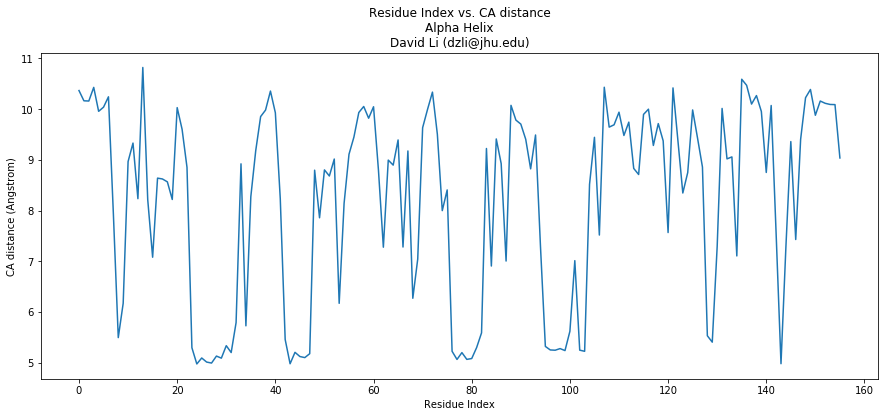

In [4]:
plt.clf()
fig = plt.figure(figsize=(15, 6))
plt.plot(range(len(dists)), dists)
plt.title('Residue Index vs. CA distance\nAlpha Helix\nDavid Li (dzli@jhu.edu)')
plt.xlabel('Residue Index')
plt.ylabel('CA distance (Angstrom)')
plt.savefig("dli44.png")